In [ ]:
#jul 2 2024
#https://gist.github.com/tuelwer/0b52817e9b6251d940fd8e2921ec5e20
#discussion / explaination https://discuss.pytorch.org/t/try-to-understand-how-to-use-optim-lbfgs/195602/3

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


# 2d Rosenbrock function
def f(x):
    return (x[0])**2 + 100 * (x[1])**2 #i changed so its simple lol


# Gradient descent
x_gd = 10*torch.ones(2, 1)
x_gd.requires_grad = True
gd = optim.SGD([x_gd], lr=1e-5)
history_gd = []
for i in range(100):
    gd.zero_grad()
    objective = f(x_gd)
    objective.backward()
    gd.step()
    history_gd.append(objective.item())


# L-BFGS
def closure():
    lbfgs.zero_grad()
    objective = f(x_lbfgs)
    objective.backward()
    return objective

x_lbfgs = 10*torch.ones(2, 1)
x_lbfgs.requires_grad = True

lbfgs = optim.LBFGS([x_lbfgs],
                    history_size=10,
                    max_iter=4,
                    line_search_fn="strong_wolfe")

history_lbfgs = []
for i in range(100):
    history_lbfgs.append(f(x_lbfgs).item())
    lbfgs.step(closure)


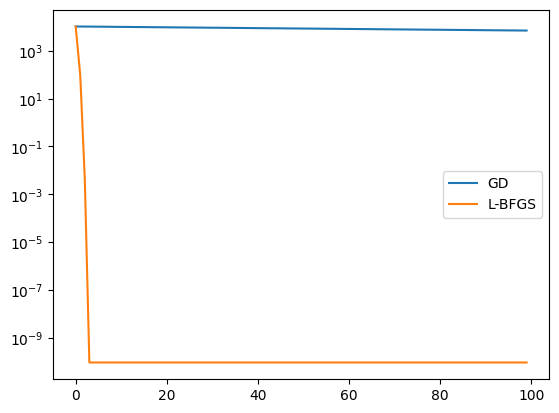

In [2]:

# Plotting
plt.semilogy(history_gd, label='GD')
plt.semilogy(history_lbfgs, label='L-BFGS')
plt.legend()
plt.show()